In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
topics = pd.read_csv('reuters-csv/topic_codes.txt', delimiter='\t')
topics = topics['CODE'].tolist()

In [25]:
full_train = pd.read_csv('reuters-csv/inputs_trunc.csv', delimiter = ';')

In [54]:
full_train['target'] = full_train['target'].apply(eval)
labels = list(full_train.target.values)

In [57]:
train = pd.DataFrame(labels, columns = topics)
train

,1POL,2ECO,3SPO,4GEN,6INS,7RSK,8YDB,9BNX,ADS10,BNW14,...,M13,M131,M132,M14,M141,M142,M143,MCAT,MEUR,PRB13
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train_n = len(train)
print(train_n)
train_topics = train.sum(axis = 0)
train_top = train_topics.nlargest(25)
print(train_top)

299773
CCAT     137531
GCAT      82580
MCAT      81940
C15       59207
ECAT      42374
C151      33963
M14       33786
C152      27095
M13       21499
GPOL      20042
M11       19593
M141      19124
C18       18675
E21       16055
C181      15598
C17       14398
C31       13862
C13       13216
GDIP      13040
GSPO      12592
GCRIM     11705
C24       11338
M132      11298
M12       11210
M131      10930
dtype: int64


In [59]:
test = pd.read_csv('scores/test_results3_m13.csv', delimiter = ' ')
test

,id,1POL,2ECO,3SPO,4GEN,6INS,7RSK,8YDB,9BNX,ADS10,...,M13,M131,M132,M14,M141,M142,M143,MCAT,MEUR,PRB13
0,740900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,740901,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,740902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,740903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,740904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33137,600428,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
33138,600429,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33139,600430,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33140,600431,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
test_n = len(test)
print(test_n)
test_topics = test.sum(axis = 0)
test_top = (test_topics.iloc[1:127]).nlargest(25)
print(test_top)


33142
CCAT     14489
MCAT      9478
GCAT      8922
C15       5947
ECAT      4205
M14       3733
C151      3262
C152      2495
M13       2431
M11       2293
M141      2132
C18       1879
GPOL      1611
C181      1482
E21       1391
GDIP      1381
GSPO      1367
M132      1346
C17       1275
M12       1217
GCRIM     1138
M131      1089
C31        986
M143       941
E212       854
dtype: int64


In [72]:
topics_top = set(list(train_top.index) + list(test_top.index))
topics_top

{'C13',
 'C15',
 'C151',
 'C152',
 'C17',
 'C18',
 'C181',
 'C24',
 'C31',
 'CCAT',
 'E21',
 'E212',
 'ECAT',
 'GCAT',
 'GCRIM',
 'GDIP',
 'GPOL',
 'GSPO',
 'M11',
 'M12',
 'M13',
 'M131',
 'M132',
 'M14',
 'M141',
 'M143',
 'MCAT'}

In [117]:
comparison = pd.DataFrame(0, index = topics_top, columns = ['TRAIN', 'TEST'])
comparison['TRAIN'] = train_top / train_n
comparison['TEST'] = test_top / test_n
comparison = comparison.fillna(0)
comparison.sort_values(by = ['TRAIN', 'TEST'], ascending = False, inplace = True)
print(comparison)

          TRAIN      TEST
CCAT   0.458784  0.437179
GCAT   0.275475  0.269205
MCAT   0.273340  0.285982
C15    0.197506  0.179440
ECAT   0.141354  0.126878
C151   0.113296  0.098425
M14    0.112705  0.112637
C152   0.090385  0.075282
M13    0.071718  0.073351
GPOL   0.066857  0.048609
M11    0.065359  0.069187
M141   0.063795  0.064329
C18    0.062297  0.056695
E21    0.053557  0.041971
C181   0.052033  0.044717
C17    0.048030  0.038471
C31    0.046242  0.029751
C13    0.044087  0.000000
GDIP   0.043500  0.041669
GSPO   0.042005  0.041247
GCRIM  0.039046  0.034337
C24    0.037822  0.000000
M132   0.037689  0.040613
M12    0.037395  0.036721
M131   0.036461  0.032859
M143   0.000000  0.028393
E212   0.000000  0.025768


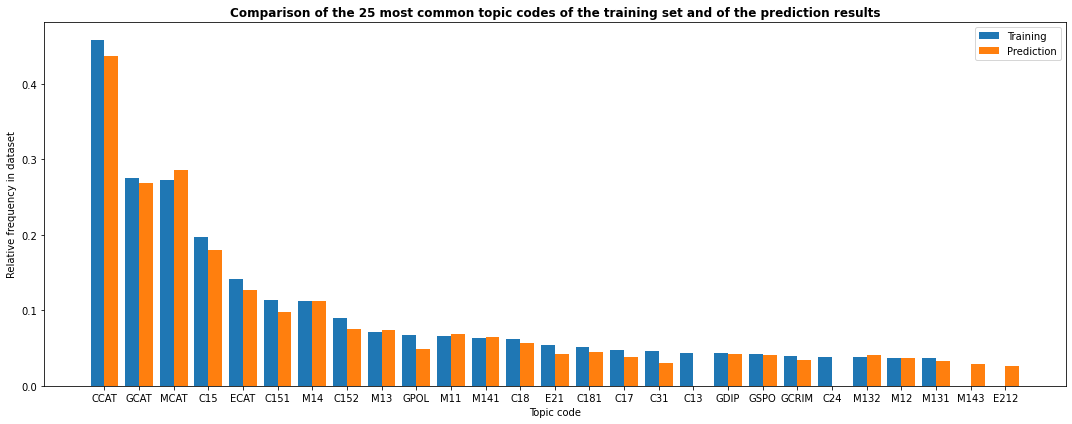

In [122]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams['savefig.facecolor'] = 'white'
x = np.arange(len(topics_top))
w = 0.4
fig, ax = plt.subplots()
bars1 = ax.bar(x - w/2, comparison['TRAIN'], w, label = 'Training')
bars2 = ax.bar(x + w/2, comparison['TEST'], w, label = 'Prediction')
ax.set_title('Comparison of the 25 most common topic codes of the training set and of the prediction results', fontweight = "bold")
ax.set_ylabel('Relative frequency in dataset')
ax.set_xlabel('Topic code')
ax.set_xticks(x)
ax.set_xticklabels(comparison.index)
ax.legend()
fig.tight_layout()
plt.show()
fig.savefig(f'scores/test-distribution')

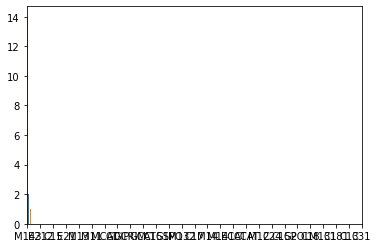

In [97]:
fig, ax = plt.subplots()
ax.hist(comparison, align = 'left')
ax.set_xticks([i for i in range(len(topics_top))])
ax.set_xticklabels(topics_top)
plt.show()